In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [329]:
path            = r"C:\Users\kagan\OneDrive\Masaüstü\SA_PORTFOLIO_DATASETS\turkey_economic_propensity.xlsx"
propensity_data = pd.read_excel(path)
propensity_data.head(10)

,date,prop_durable,prop_auto,prop_house_rep,prop_house_constr
0,2012-01,93.346455,14.054832,37.436217,11.057373
1,2012-02,95.349390,11.941920,35.433814,10.172997
2,2012-03,95.339887,11.693198,35.405806,12.048535
3,2012-04,92.364632,12.727708,41.261027,11.200367
4,2012-05,92.788703,12.470892,40.667602,10.457748
5,2012-06,94.384455,11.823285,32.280654,10.570607
6,2012-07,95.089967,10.701879,29.347888,11.535162
7,2012-08,93.165130,11.074499,29.195664,9.218163
8,2012-09,96.294834,12.694453,26.349969,8.199744
9,2012-10,92.203157,10.953728,27.266032,10.268064


In [330]:
explanatory = ["prop_durable", "prop_auto", "prop_house_rep", "prop_house_constr"]
propensity_data[explanatory] = propensity_data[explanatory].apply(np.log10)

In [331]:
propensity_data

,date,prop_durable,prop_auto,prop_house_rep,prop_house_constr
0,2012-01,1.970098,1.147826,1.573292,1.043652
1,2012-02,1.979318,1.077074,1.549418,1.007449
2,2012-03,1.979275,1.067933,1.549074,1.080934
3,2012-04,1.965506,1.104750,1.615540,1.049232
4,2012-05,1.967495,1.095898,1.609249,1.019438
...,...,...,...,...,...
145,2024-02,1.989117,1.247937,1.503487,0.987295
146,2024-03,1.986885,1.283411,1.534627,1.029375
147,2024-04,1.981521,1.251164,1.535101,1.053450
148,2024-05,1.980431,1.249374,1.504109,1.000634


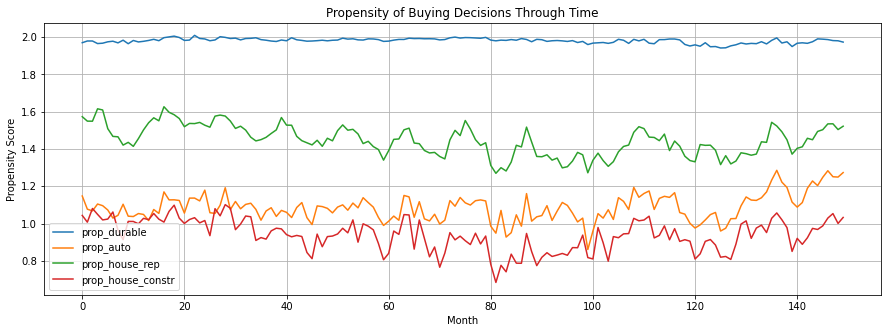

In [332]:
_ = plt.figure(figsize = (15, 5))
_ = plt.grid(True)
for exp in explanatory:
    _ = plt.plot(propensity_data[exp], label=exp)
    _ = plt.legend()
_ = plt.title("Propensity of Buying Decisions Through Time")
_ = plt.xlabel("Month")
_ = plt.ylabel("Propensity Score")

In [333]:
corr_matrix = propensity_data[explanatory].corr()

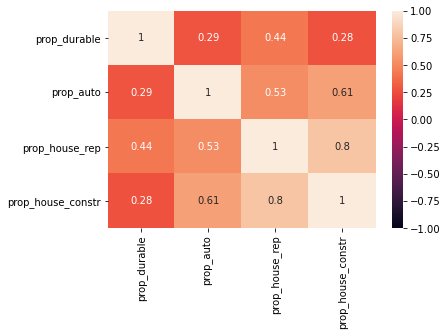

In [334]:
from seaborn import heatmap
_ = heatmap(corr_matrix, vmin = -1, vmax = 1,
           annot = True)

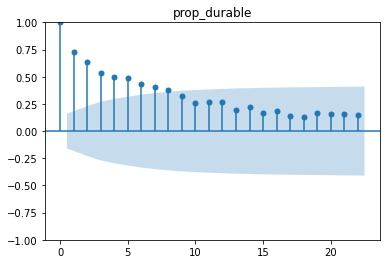

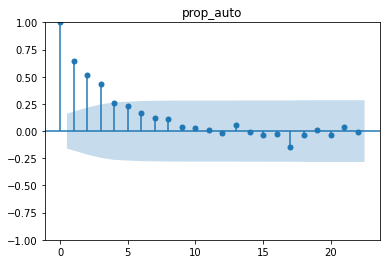

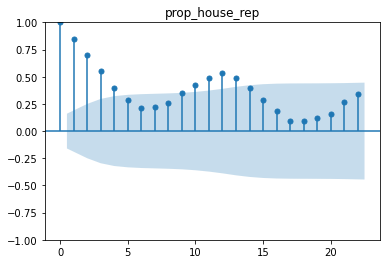

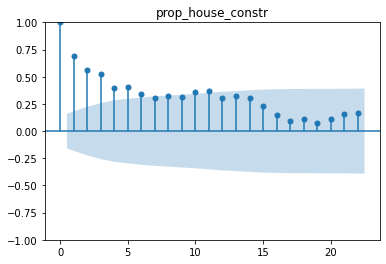

In [335]:
for exp in explanatory:
    _ = plot_acf(propensity_data[exp])
    _ = plt.title(exp)


In [336]:
stationary, nonstationary = [], []
for exp in explanatory:
    series = propensity_data[exp]
    print("Test stat p value for {0}: ".format(exp))
    print(adfuller(series)[1])
    if adfuller(series)[1] > 0.05:
        nonstationary.append(exp)
    else:
        stationary.append(exp)

Test stat p value for prop_durable: 
0.007349467020341955
Test stat p value for prop_auto: 
0.109407095116551
Test stat p value for prop_house_rep: 
0.00825207473952214
Test stat p value for prop_house_constr: 
0.07679931400410972


C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


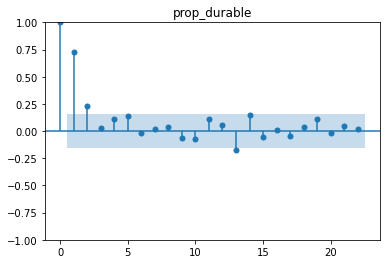

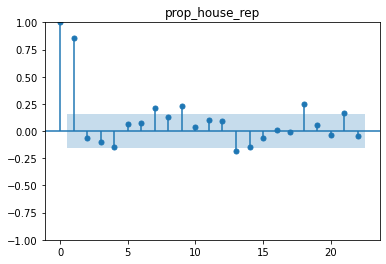

In [337]:
for var in stationary:
    _ = plot_pacf(propensity_data[var])
    _ = plt.title(var)


C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


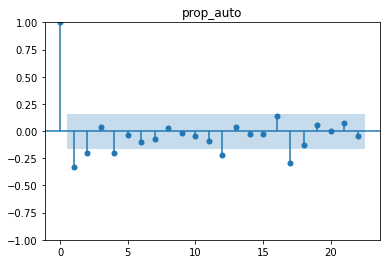

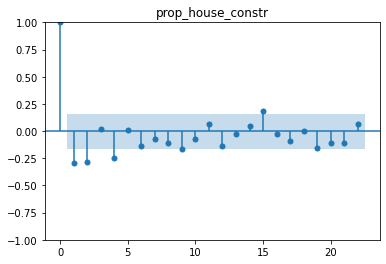

In [338]:
for var in nonstationary:
    _ = plot_pacf(propensity_data[var].diff().dropna())
    _ = plt.title(var)

# Models

In [339]:
horizon           = 36
test_durable      = propensity_data["prop_durable"][(len(propensity_data)-horizon+1):]
test_auto         = propensity_data["prop_auto"][(len(propensity_data)-horizon+1):]
test_house_constr = propensity_data["prop_house_constr"][(len(propensity_data)-horizon+1):]
test_house_rep    = propensity_data["prop_house_rep"][(len(propensity_data)-horizon+1):]

In [340]:
propensity_data["prop_durable"].iloc[-1]

1.9733581569850929

## Propensity to buy durable items

                               SARIMAX Results                                
Dep. Variable:           prop_durable   No. Observations:                  150
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 501.156
Date:                Fri, 12 Jul 2024   AIC                           -994.312
Time:                        15:21:55   BIC                           -982.270
Sample:                             0   HQIC                          -989.420
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9804      0.003    602.954      0.000       1.974       1.987
ar.L1          0.5642      0.076      7.436      0.000       0.415       0.713
ar.L2          0.2224      0.074      3.012      0.0

C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

Mean squared forecast error:  0.00013451966150688073


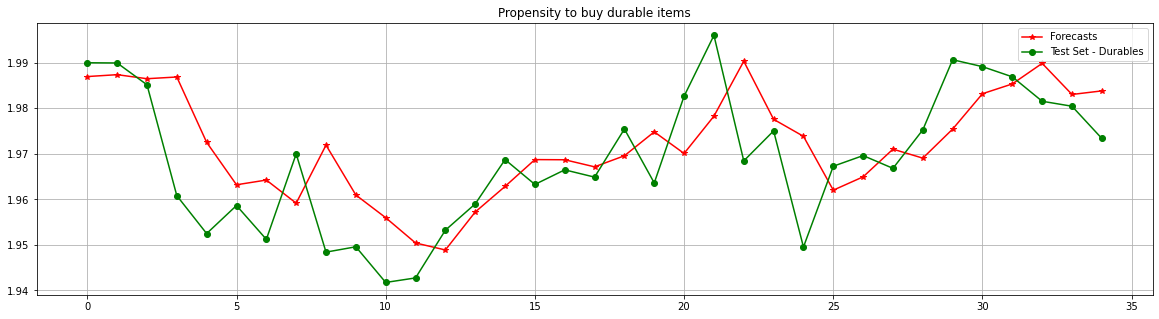

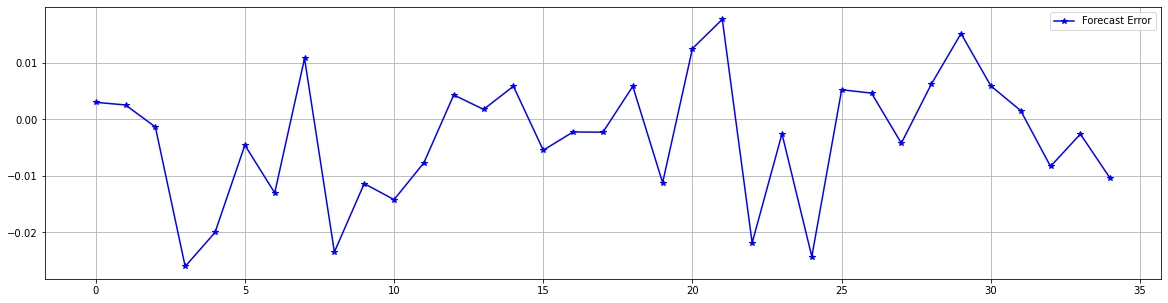

In [343]:
model_durable = ARIMA(propensity_data["prop_durable"],
                     order = (2, 0, 0)).fit()
print(model_durable.summary())
print("Forecast for 2024-07: ", model_durable.forecast())
print("Expected change compared to the last month: ", model_durable.forecast() - propensity_data["prop_durable"].iloc[-1])
forecasts_durable = []
for i in range(1, horizon):
    data = propensity_data["prop_durable"][:(-horizon+i)]
    model_durable = ARIMA(data, order = (2, 0, [10])).fit()
    forecast = model_durable.forecast()
    forecasts_durable.append(forecast)
    
error_durable = test_durable.to_numpy() - np.array(forecasts_durable).flatten()
print("Mean squared forecast error: ", mean_squared_error(np.array(forecasts_durable).flatten(), test_durable.to_numpy()))
_ = plt.figure(figsize = (20, 5))
_ = plt.plot(forecasts_durable, "r-*", label = "Forecasts")
_ = plt.plot(test_durable.to_numpy(), "g-o", label = "Test Set - Durables")
_ = plt.title("Propensity to buy durable items")
_ = plt.legend()
_ = plt.grid(True)
_ = plt.figure(figsize = (20, 5))
_ = plt.plot(error_durable, "b-*", label = "Forecast Error")
_ = plt.grid(True)
_ = plt.legend()

## Propensity to buy automobiles

                               SARIMAX Results                                
Dep. Variable:              prop_auto   No. Observations:                  150
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 221.915
Date:                Fri, 12 Jul 2024   AIC                           -437.830
Time:                        15:44:45   BIC                           -428.818
Sample:                             0   HQIC                          -434.169
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3986      0.083     -4.775      0.000      -0.562      -0.235
ar.L2         -0.1960      0.081     -2.427      0.015      -0.354      -0.038
sigma2         0.0030      0.000      9.112      0.0

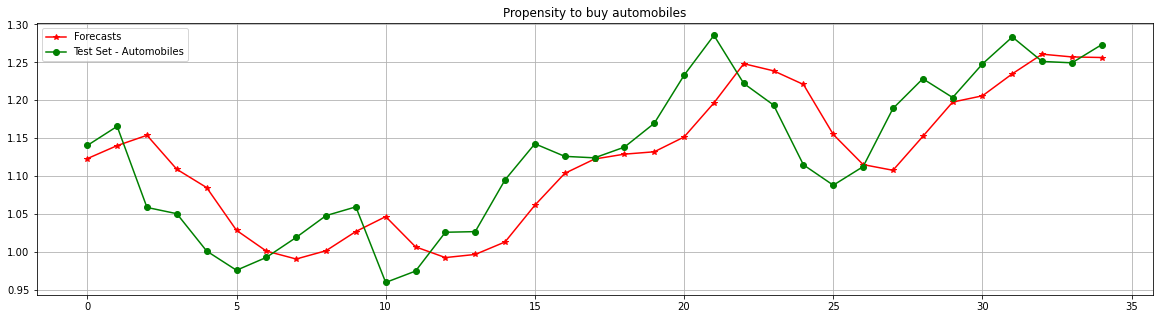

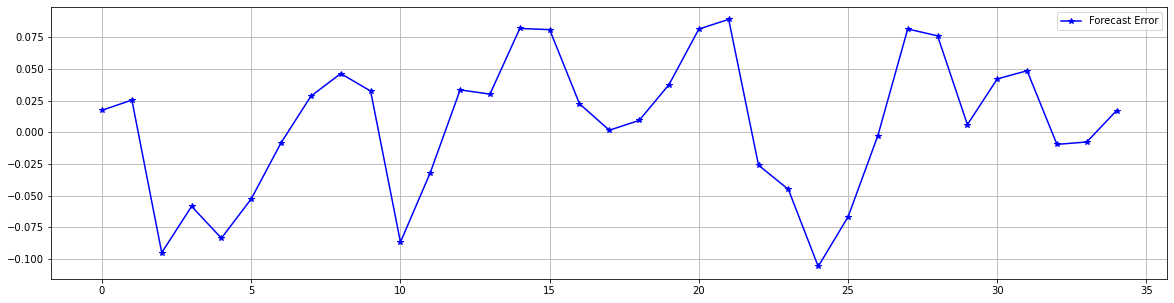

In [344]:
model_auto = ARIMA(propensity_data["prop_auto"],
                     order = (2, 1, 0)).fit()
print(model_auto.summary())
print("Forecast for 2024-07: ", model_auto.forecast())
print("Expected change compared to the last month: ", model_auto.forecast() - propensity_data["prop_auto"].iloc[-1])
forecasts_auto = []
for i in range(1, horizon):
    data = propensity_data["prop_auto"][:(-horizon+i)]
    model_auto = ARIMA(data, order = (2, 1, 0)).fit()
    forecast = model_auto.forecast()
    forecasts_auto.append(forecast)
    
error_auto = test_auto.to_numpy() - np.array(forecasts_auto).flatten()
print("Mean squared forecast error: ", mean_squared_error(np.array(forecasts_auto).flatten(), test_auto.to_numpy()))
_ = plt.figure(figsize = (20, 5))
_ = plt.plot(forecasts_auto, "r-*", label = "Forecasts")
_ = plt.plot(test_auto.to_numpy(), "g-o", label = "Test Set - Automobiles")
_ = plt.title("Propensity to buy automobiles")
_ = plt.legend()
_ = plt.grid(True)
_ = plt.figure(figsize = (20, 5))
_ = plt.plot(error_auto, "b-*", label = "Forecast Error")
_ = plt.grid(True)
_ = plt.legend()

## Propensity to repair houses

                               SARIMAX Results                                
Dep. Variable:         prop_house_rep   No. Observations:                  150
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 263.759
Date:                Fri, 12 Jul 2024   AIC                           -521.518
Time:                        16:11:34   BIC                           -512.486
Sample:                             0   HQIC                          -517.849
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4546      0.023     64.021      0.000       1.410       1.499
ar.L1          0.8610      0.046     18.920      0.000       0.772       0.950
sigma2         0.0017      0.000      9.135      0.0

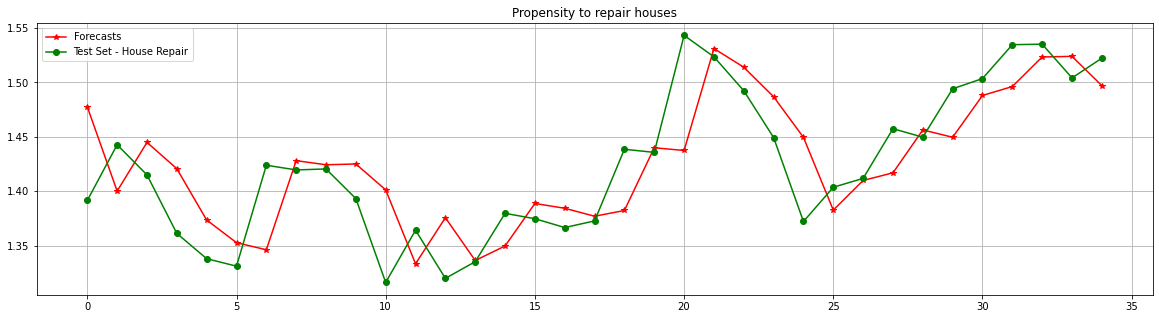

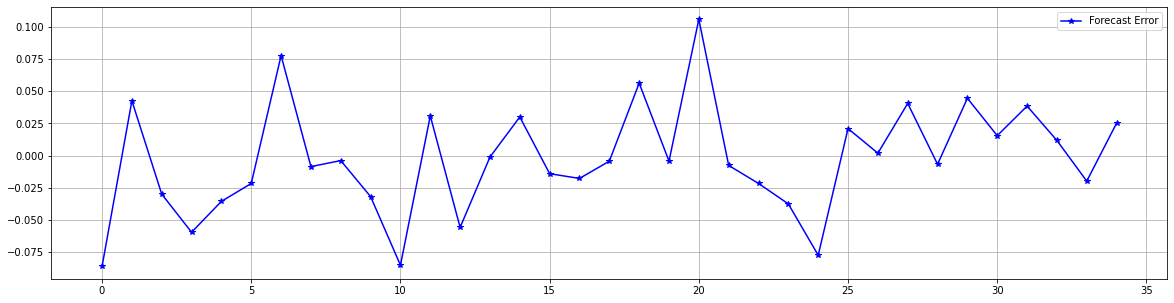

In [350]:
model_house_rep = ARIMA(propensity_data["prop_house_rep"],
                     order = (1, 0, 0)).fit()
print(model_house_rep.summary())
print("Forecast for 2024-07: ", model_house_rep.forecast())
print("Expected change compared to the last month: ", model_house_rep.forecast() - propensity_data["prop_house_rep"].iloc[-1])
forecasts_house_rep = []
for i in range(1, horizon):
    data = propensity_data["prop_house_rep"][:(-horizon+i)]
    model_house_rep = ARIMA(data, order = (1, 0, 0)).fit()
    forecast = model_house_rep.forecast()
    forecasts_house_rep.append(forecast)
    
error_house_rep = test_house_rep.to_numpy() - np.array(forecasts_house_rep).flatten()
print("Mean squared forecast error: ", mean_squared_error(np.array(forecasts_house_rep).flatten(), test_house_rep.to_numpy()))
_ = plt.figure(figsize = (20, 5))
_ = plt.plot(forecasts_house_rep, "r-*", label = "Forecasts")
_ = plt.plot(test_house_rep.to_numpy(), "g-o", label = "Test Set - House Repair")
_ = plt.title("Propensity to repair houses")
_ = plt.legend()
_ = plt.grid(True)
_ = plt.figure(figsize = (20, 5))
_ = plt.plot(error_house_rep, "b-*", label = "Forecast Error")
_ = plt.grid(True)
_ = plt.legend()

## Propensity to construct or buy houses

                               SARIMAX Results                                
Dep. Variable:      prop_house_constr   No. Observations:                  150
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 205.578
Date:                Fri, 12 Jul 2024   AIC                           -405.156
Time:                        16:16:36   BIC                           -396.144
Sample:                             0   HQIC                          -401.495
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3734      0.082     -4.530      0.000      -0.535      -0.212
ar.L2         -0.2773      0.073     -3.810      0.000      -0.420      -0.135
sigma2         0.0037      0.000      8.793      0.0

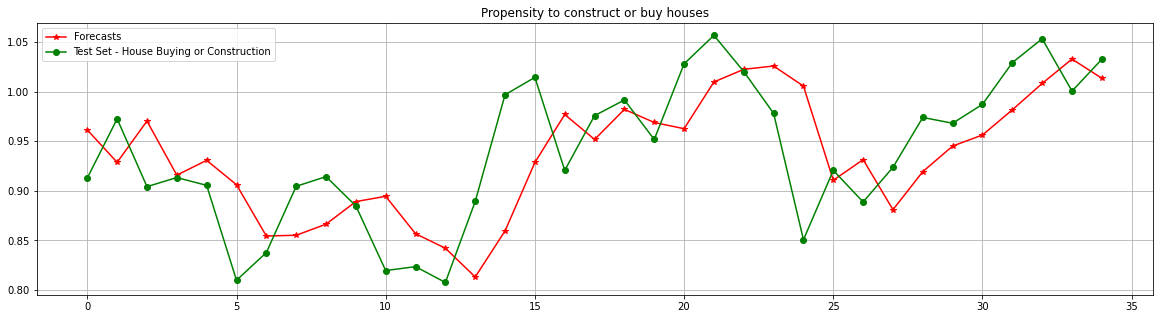

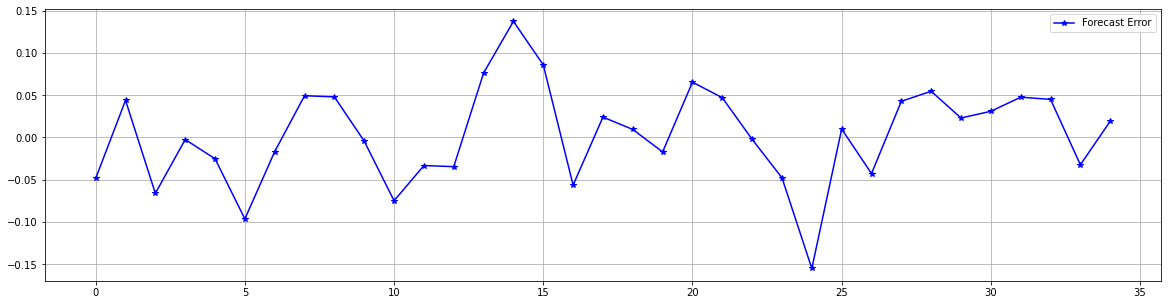

In [354]:
model_house_constr = ARIMA(propensity_data["prop_house_constr"],
                     order = (2, 1, 0)).fit()
print(model_house_constr.summary())
print("Forecast for 2024-07: ", model_house_constr.forecast())
print("Expected change compared to the last month: ", model_house_constr.forecast() - propensity_data["prop_house_constr"].iloc[-1])
forecasts_house_constr = []
for i in range(1, horizon):
    data = propensity_data["prop_house_constr"][:(-horizon+i)]
    model_house_constr = ARIMA(data, order = (2, 1, 0)).fit()
    forecast = model_house_constr.forecast()
    forecasts_house_constr.append(forecast)
    
error_house_constr = test_house_constr.to_numpy() - np.array(forecasts_house_constr).flatten()
print("Mean squared forecast error: ", mean_squared_error(np.array(forecasts_house_constr).flatten(), test_house_constr.to_numpy()))
_ = plt.figure(figsize = (20, 5))
_ = plt.plot(forecasts_house_constr, "r-*", label = "Forecasts")
_ = plt.plot(test_house_constr.to_numpy(), "g-o", label = "Test Set - House Buying or Construction")
_ = plt.title("Propensity to construct or buy houses")
_ = plt.legend()
_ = plt.grid(True)
_ = plt.figure(figsize = (20, 5))
_ = plt.plot(error_house_constr, "b-*", label = "Forecast Error")
_ = plt.grid(True)
_ = plt.legend()